In [1]:
!pip install cufflinks
!pip install chart_studio

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from chart_studio.plotly import plot, iplot

%matplotlib inline

In [3]:
df = pd.read_excel('Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Automated EDA

In [5]:
!pip install pandas-profiling

In [6]:
import pandas_profiling as pf

In [7]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# manual EDA

In [8]:
df.shape

(10683, 11)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
# Remove nan from data set
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Feature Engineering

### let's convert Date_of_Journey to its appropriate format as date time with regards to day and month

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Date_of_Journey

In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey'] = (df['Date_of_Journey']).dt.day
df['Month_of_Journey'] = (df['Date_of_Journey']).dt.month

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '18/04/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1

In [14]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [15]:
df.drop(['Date_of_Journey'], axis=1,inplace=True)

In [16]:
#Dep_Time
df['Dep_hr'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [17]:
df.drop(['Dep_Time'],axis=1,inplace=True)

# Arrival time

In [18]:
df['Arrival_hr'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [19]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
duration = df['Duration'].str.split(' ',expand=True) # split duration data points based on 
duration[1].fillna('00m',inplace=True)
df['Duration_hr'] = duration[0].apply(lambda x: x[:-1])
df['Duration_min'] = duration[1].apply(lambda x: x[:-1])

In [21]:
df.drop(['Duration'],axis=1,inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

# Count of Airlines

In [24]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Airline Vs Price

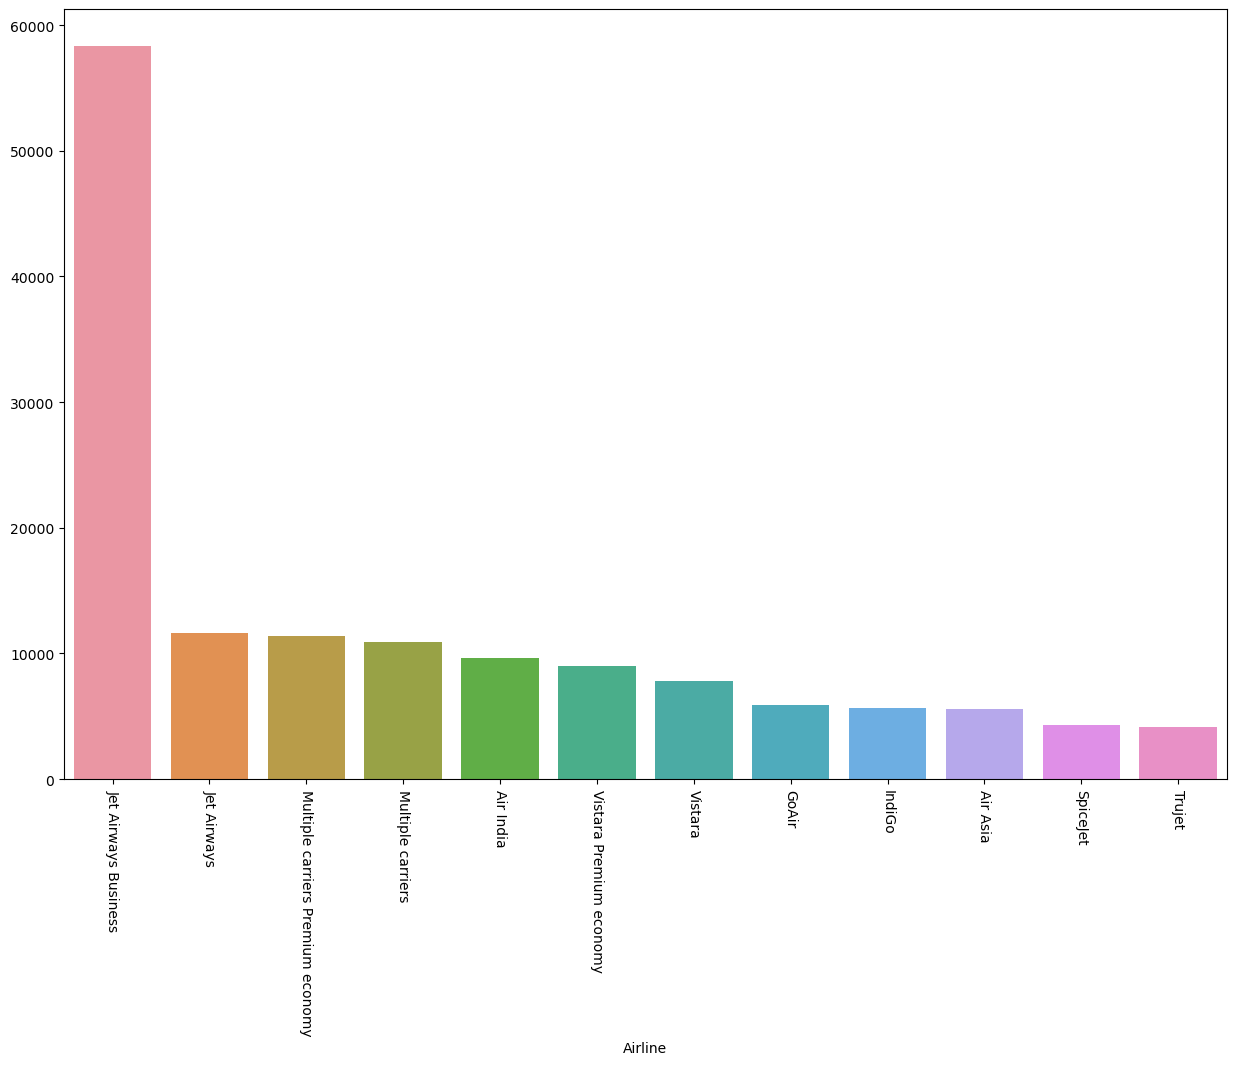

In [25]:
Airprices = df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=Airprices.index,y=Airprices.values)
plt.xticks(rotation=270)
plt.show()


### Jet Airways business has the highest price with truejet having the lowest

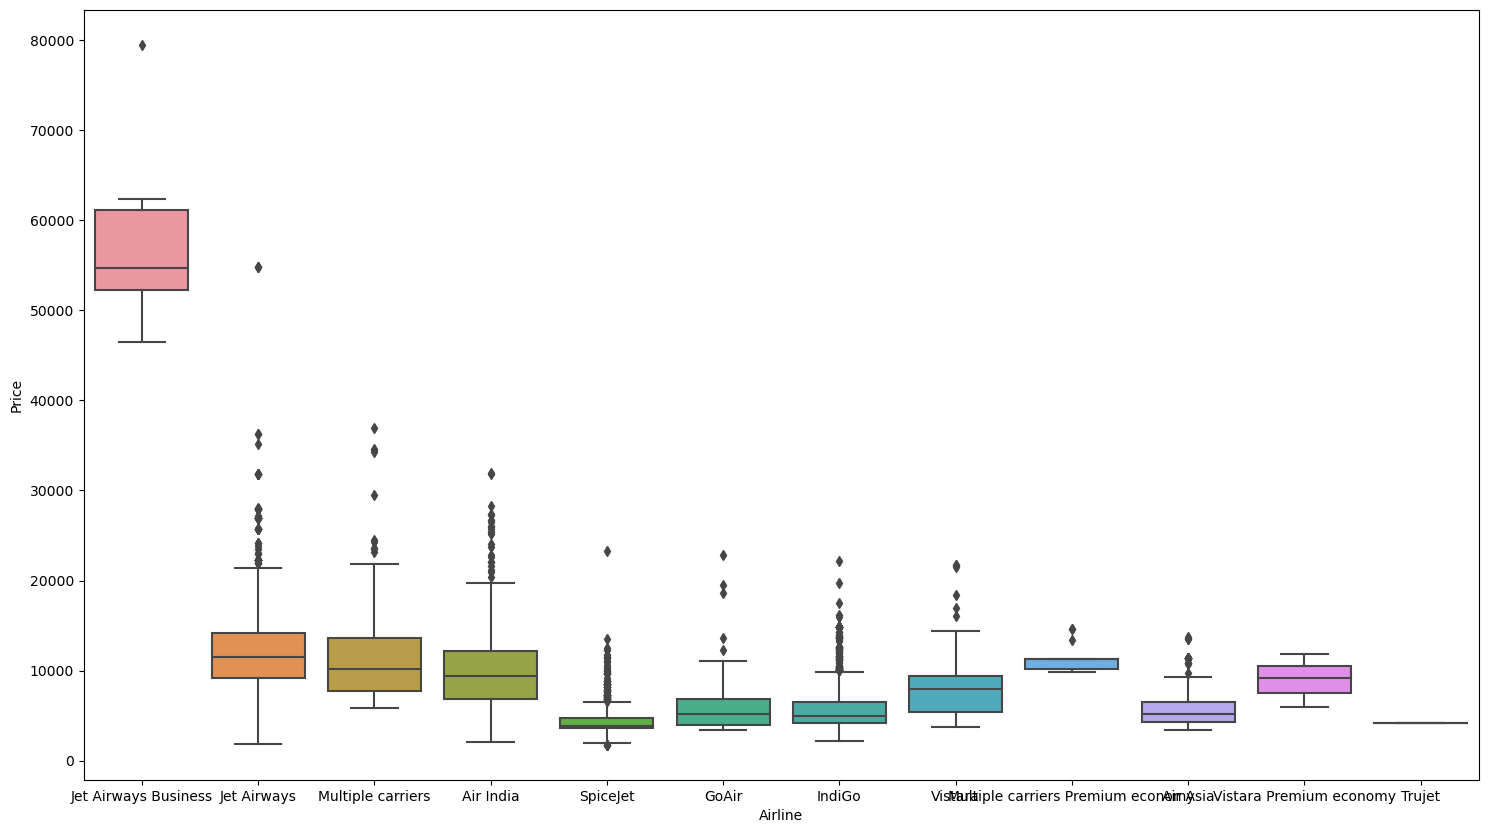

In [26]:
plt.figure(figsize=(18,10))
sns.boxplot(y="Price",x="Airline",data=df.sort_values('Price',ascending=False))
plt.show()

# Price Based on Number of stops 

In [27]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

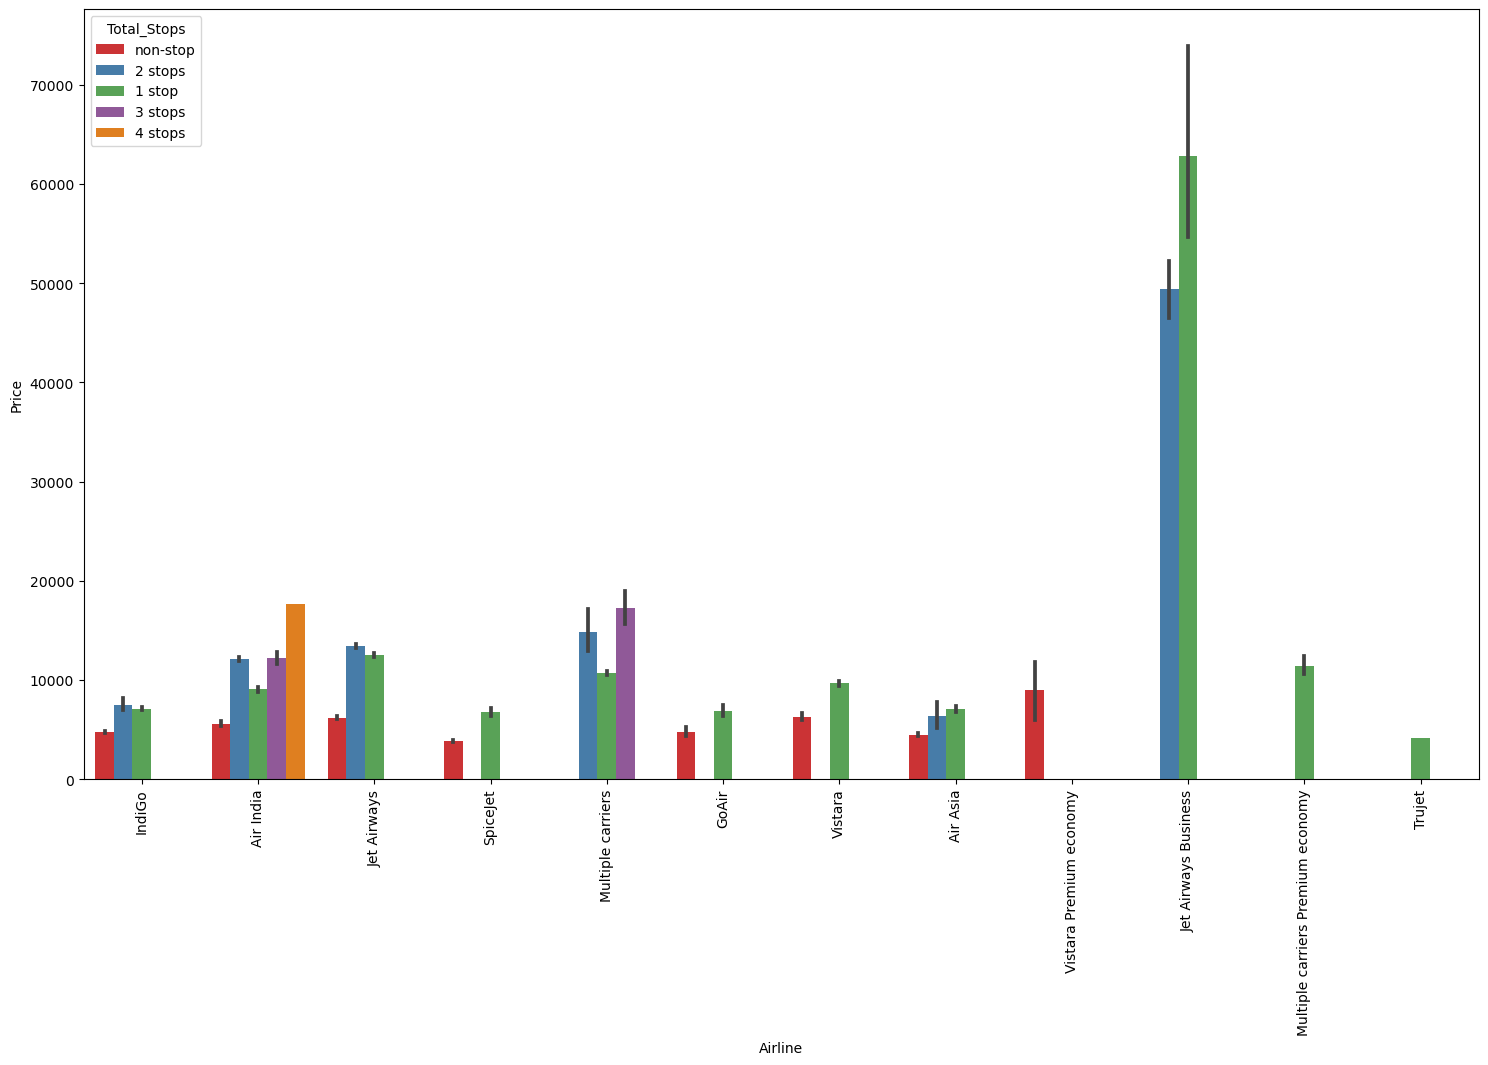

In [28]:
plt.figure(figsize=(18,10))
ax = sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### one stop and two stop jet airways business is having the highest price

In [29]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

# Source Vs Price

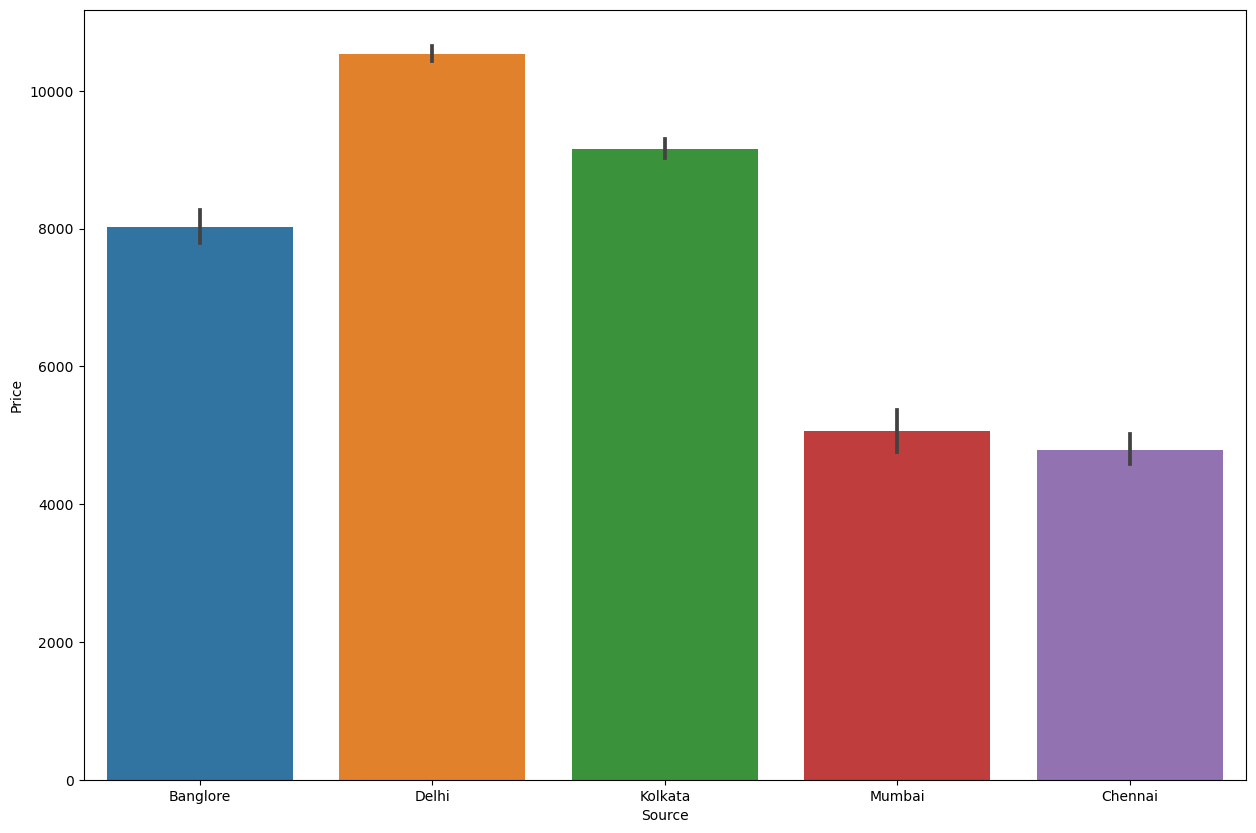

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

# Destination vs Price

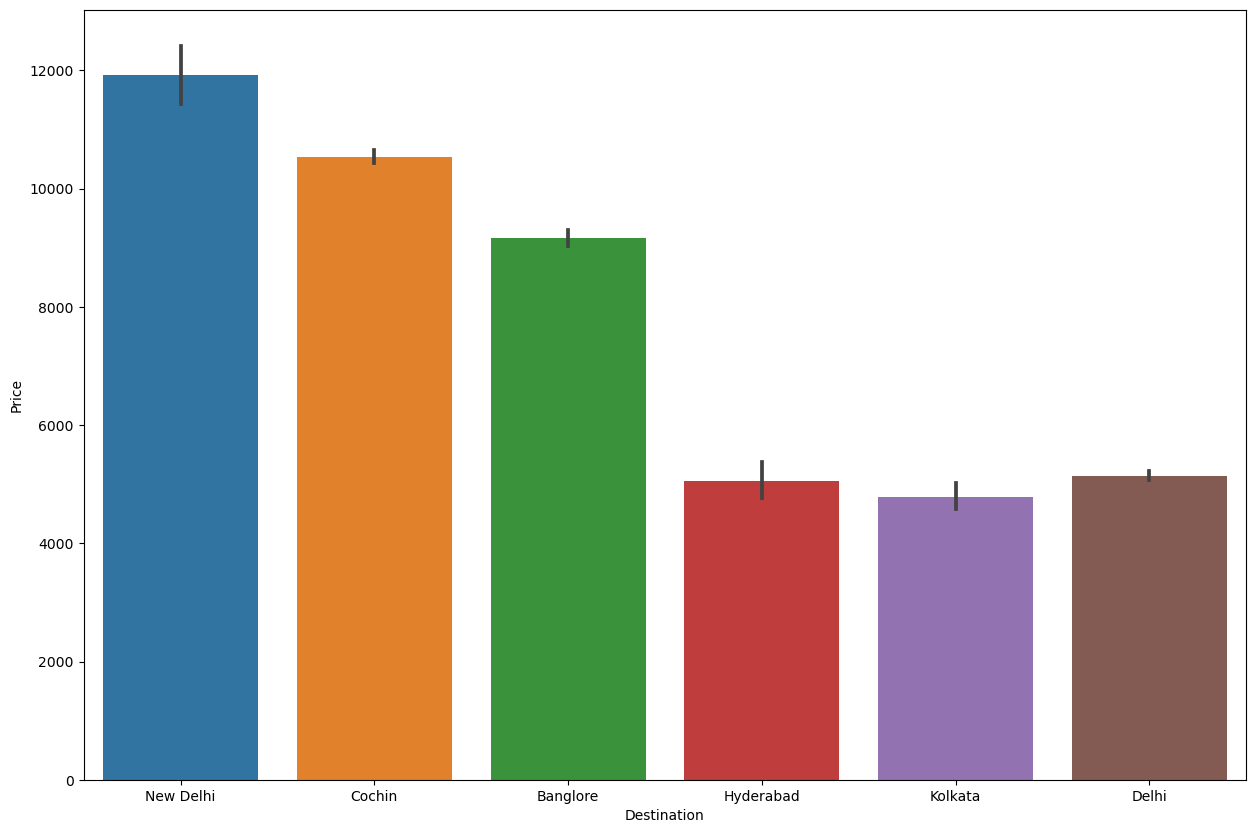

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [32]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [34]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

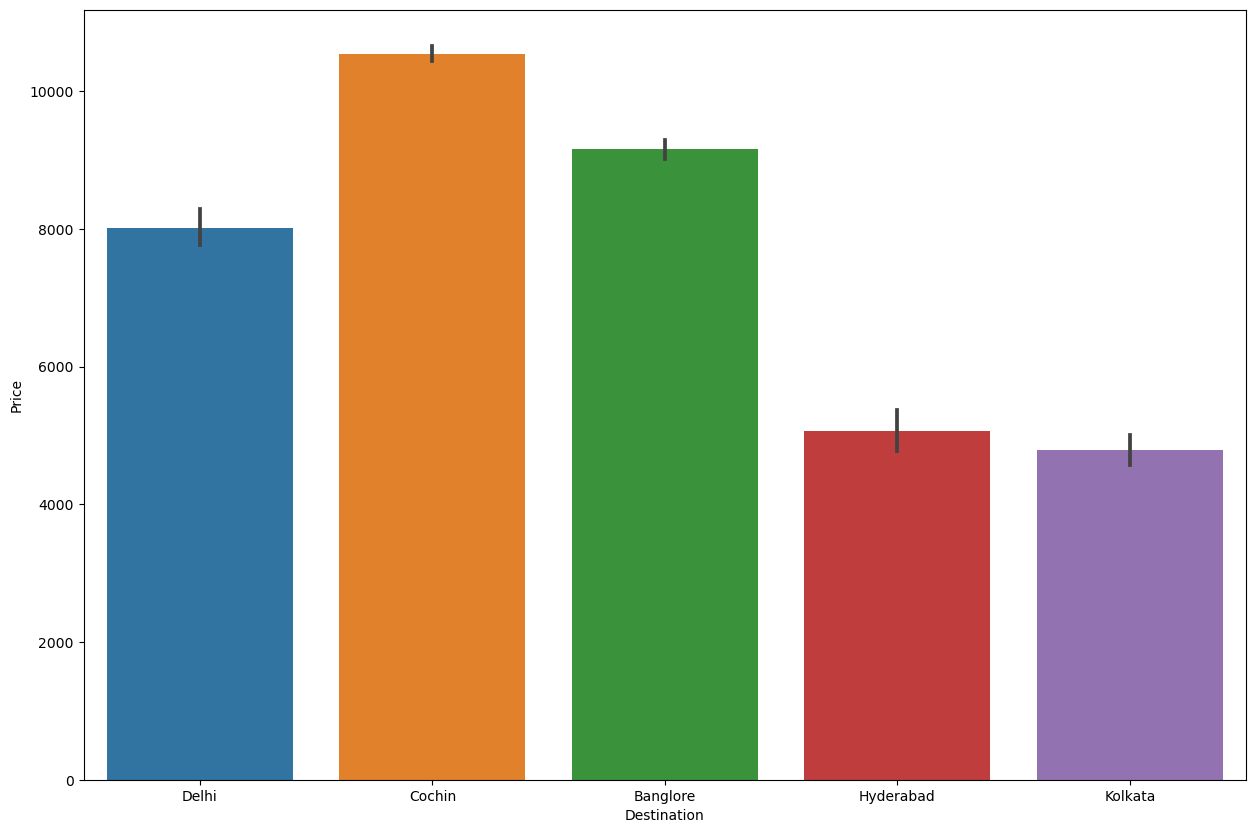

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

<AxesSubplot:>

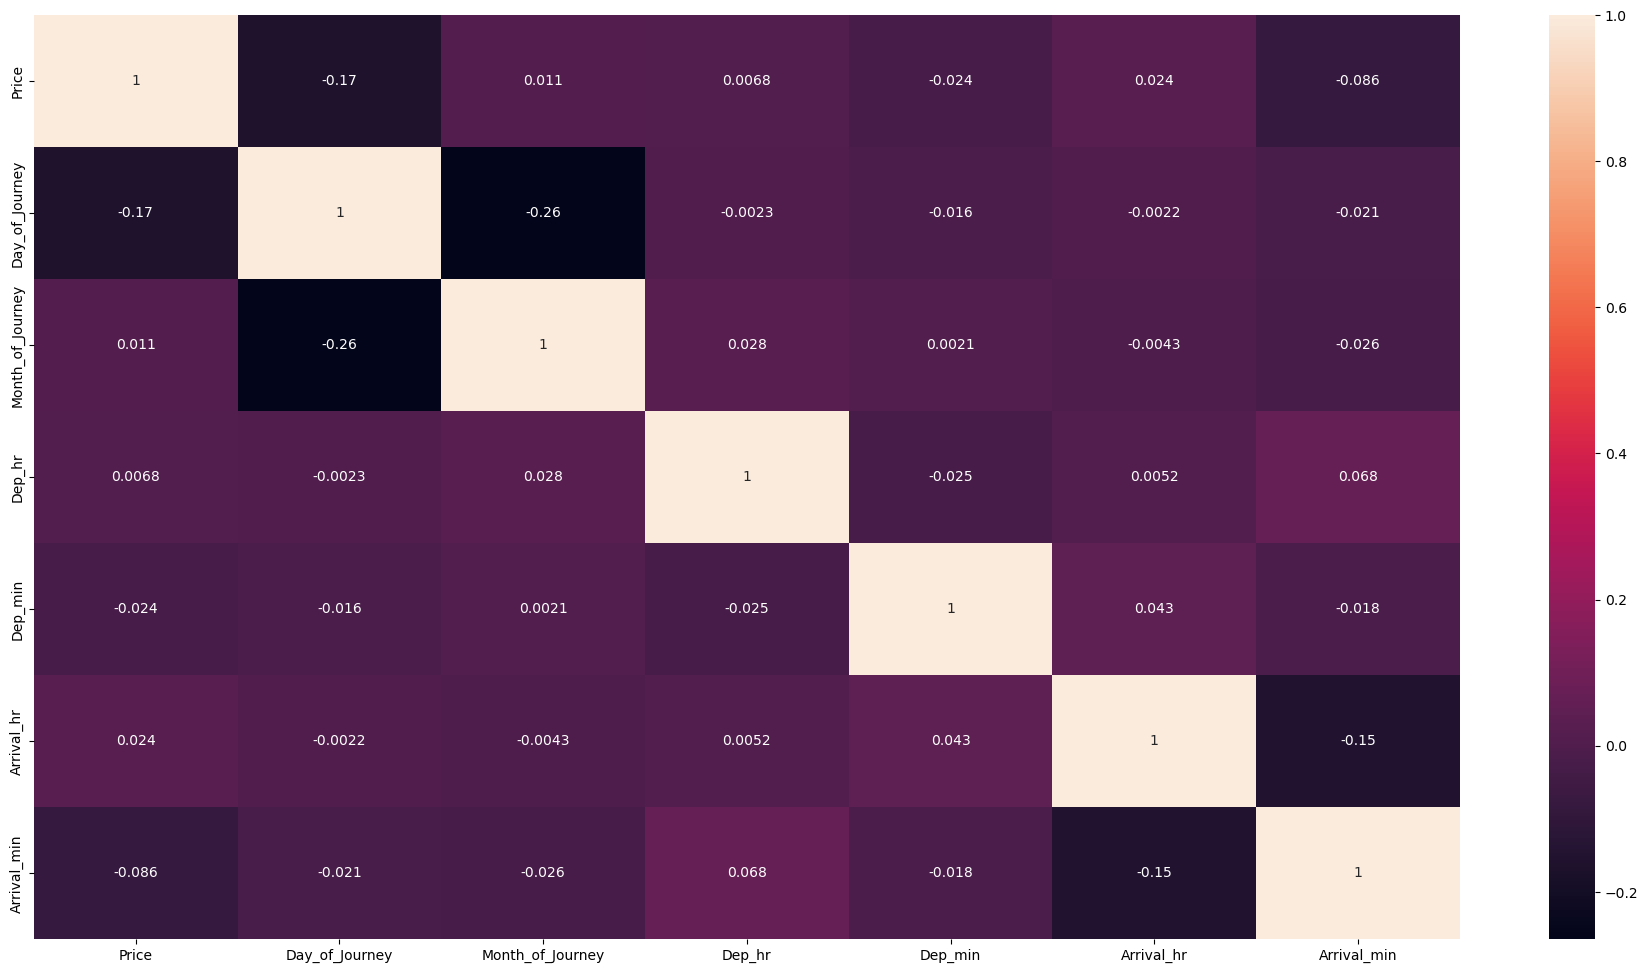

In [36]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

## Features are less correlated which is good thing to avoid multicolinearity

In [37]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [38]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

# Apply one hot Encoding on categotical variables

In [39]:
# handling categorical values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)
# print(df['Source'].value_counts())
# print(df['Destination'].value_counts())

source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [40]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [41]:
df.shape

(10682, 31)

# Test Data 

In [42]:
df_test = pd.read_excel('Test_set.xlsx')

In [43]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Let's Perform that same steps as we did for train data earlier

In [44]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'])
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time 
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values 
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)


/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '21/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '18/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/venkyn/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1

In [45]:
df_test.drop(['Airline','Source','Destination','Additional_Info','Route'],inplace=True,axis=1)

In [46]:
df_test.shape

(2671, 28)

In [47]:
x = df.drop(['Route','Price','Additional_Info'],axis=1)
y = df['Price']

In [48]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,5,1,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,6,9,9,25,4,25,19,00


In [49]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

# Model Building Hyper-Parameter Tuning

In [50]:
# Extra Trees Regressor

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=50)

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
et_model = ExtraTreesRegressor(n_estimators=120)
et_model.fit(X_train,y_train)
y_predict = et_model.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.768489745943542

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_predict = rf_model.predict(X_test)
r2_score(y_test,y_predict)

0.7900786727446143

### HyperParameter

In [54]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=80,stop=1500,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(6,45,num=5)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]


# create random grid
rand_grid = {'n_estimators': n_estimators,
             'max_features': max_features,
             'max_depth' : max_depth,
             'min_samples_split' : min_samples_split,
             'min_samples_leaf' : min_samples_leaf
            }
rf = RandomForestRegressor()
rcv = RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',random_state=42,n_jobs=1)

In [55]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [56]:
rf_pred = rcv.predict(X_test)
rf_pred

array([12559.64134275,  4283.73082252,  6158.92397752, ...,
       11666.40492939,  9649.20570673,  8649.68046939])

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1156.0967637977242
MSE 3954329.731330191


In [61]:
r2_score(y_test,rf_pred)

0.807422215051628

In [62]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 3.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.5 MB/s eta 0:00:00


In [87]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4465.7280757	total: 2.98ms	remaining: 2.97s
1:	learn: 4317.7245126	total: 5.13ms	remaining: 2.56s
2:	learn: 4167.9871081	total: 7.94ms	remaining: 2.64s
3:	learn: 4030.4839609	total: 10.1ms	remaining: 2.52s
4:	learn: 3906.4844760	total: 12.1ms	remaining: 2.4s
5:	learn: 3785.4580402	total: 14.1ms	remaining: 2.33s
6:	learn: 3673.8662552	total: 16.1ms	remaining: 2.28s
7:	learn: 3582.0533069	total: 18.2ms	remaining: 2.25s
8:	learn: 3495.5629367	total: 22.2ms	remaining: 2.44s
9:	learn: 3404.7478335	total: 24.4ms	remaining: 2.42s
10:	learn: 3325.1004431	total: 26.9ms	remaining: 2.42s
11:	learn: 3254.1004651	total: 28.6ms	remaining: 2.35s
12:	learn: 3184.6084064	total: 30.2ms	remaining: 2.29s
13:	learn: 3122.3064005	total: 32ms	remaining: 2.25s
14:	learn: 3067.6550706	total: 33.8ms	remaining: 2.22s
15:	learn: 3014.5169632	total: 35.7ms	remaining: 2.2s
16:	learn: 2962.4252595	total: 37.7ms	remaining: 2.18s
17:	learn: 2920.1931240	total: 39.8ms	remaining: 

240:	learn: 1830.9012081	total: 376ms	remaining: 1.18s
241:	learn: 1830.4631658	total: 378ms	remaining: 1.19s
242:	learn: 1829.1049385	total: 380ms	remaining: 1.18s
243:	learn: 1827.2710450	total: 382ms	remaining: 1.18s
244:	learn: 1825.5558309	total: 383ms	remaining: 1.18s
245:	learn: 1824.1903451	total: 385ms	remaining: 1.18s
246:	learn: 1823.0245569	total: 386ms	remaining: 1.18s
247:	learn: 1821.0847283	total: 388ms	remaining: 1.18s
248:	learn: 1819.4291339	total: 390ms	remaining: 1.17s
249:	learn: 1819.2119762	total: 391ms	remaining: 1.17s
250:	learn: 1817.1321301	total: 392ms	remaining: 1.17s
251:	learn: 1816.9862715	total: 394ms	remaining: 1.17s
252:	learn: 1815.5547028	total: 395ms	remaining: 1.17s
253:	learn: 1814.3193797	total: 397ms	remaining: 1.17s
254:	learn: 1814.2021359	total: 399ms	remaining: 1.16s
255:	learn: 1811.9162371	total: 400ms	remaining: 1.16s
256:	learn: 1811.0476624	total: 402ms	remaining: 1.16s
257:	learn: 1809.1593357	total: 404ms	remaining: 1.16s
258:	learn

490:	learn: 1611.7075721	total: 751ms	remaining: 779ms
491:	learn: 1611.6995357	total: 753ms	remaining: 778ms
492:	learn: 1610.9232680	total: 755ms	remaining: 776ms
493:	learn: 1610.1337532	total: 757ms	remaining: 775ms
494:	learn: 1609.4175330	total: 758ms	remaining: 773ms
495:	learn: 1608.9383681	total: 760ms	remaining: 772ms
496:	learn: 1608.2953724	total: 762ms	remaining: 771ms
497:	learn: 1607.7858441	total: 764ms	remaining: 770ms
498:	learn: 1607.7807148	total: 765ms	remaining: 768ms
499:	learn: 1607.2686253	total: 767ms	remaining: 767ms
500:	learn: 1606.8892919	total: 769ms	remaining: 766ms
501:	learn: 1606.8843002	total: 770ms	remaining: 764ms
502:	learn: 1606.5514718	total: 783ms	remaining: 774ms
503:	learn: 1605.7904876	total: 785ms	remaining: 773ms
504:	learn: 1605.7830545	total: 786ms	remaining: 771ms
505:	learn: 1604.3440633	total: 788ms	remaining: 769ms
506:	learn: 1603.6724544	total: 790ms	remaining: 768ms
507:	learn: 1603.1789620	total: 812ms	remaining: 786ms
508:	learn

743:	learn: 1485.0652870	total: 1.31s	remaining: 450ms
744:	learn: 1484.2598052	total: 1.31s	remaining: 449ms
745:	learn: 1483.2192624	total: 1.31s	remaining: 447ms
746:	learn: 1483.1848552	total: 1.31s	remaining: 445ms
747:	learn: 1482.7831431	total: 1.31s	remaining: 443ms
748:	learn: 1482.4419482	total: 1.32s	remaining: 441ms
749:	learn: 1482.4395726	total: 1.32s	remaining: 439ms
750:	learn: 1482.1383432	total: 1.32s	remaining: 437ms
751:	learn: 1481.6705720	total: 1.32s	remaining: 436ms
752:	learn: 1481.4897376	total: 1.32s	remaining: 434ms
753:	learn: 1480.6698025	total: 1.32s	remaining: 432ms
754:	learn: 1480.1352485	total: 1.33s	remaining: 431ms
755:	learn: 1479.4421895	total: 1.33s	remaining: 429ms
756:	learn: 1479.0443118	total: 1.33s	remaining: 427ms
757:	learn: 1478.5472154	total: 1.33s	remaining: 426ms
758:	learn: 1478.2617329	total: 1.33s	remaining: 424ms
759:	learn: 1478.0570969	total: 1.34s	remaining: 422ms
760:	learn: 1477.6051465	total: 1.34s	remaining: 420ms
761:	learn

971:	learn: 1407.9446839	total: 1.68s	remaining: 48.4ms
972:	learn: 1407.7538686	total: 1.68s	remaining: 46.6ms
973:	learn: 1407.5390575	total: 1.68s	remaining: 44.9ms
974:	learn: 1407.3172501	total: 1.68s	remaining: 43.2ms
975:	learn: 1406.9542261	total: 1.69s	remaining: 41.5ms
976:	learn: 1406.6906908	total: 1.69s	remaining: 39.7ms
977:	learn: 1406.5284250	total: 1.69s	remaining: 38ms
978:	learn: 1406.3022867	total: 1.69s	remaining: 36.3ms
979:	learn: 1405.9187172	total: 1.69s	remaining: 34.6ms
980:	learn: 1405.2746908	total: 1.7s	remaining: 32.9ms
981:	learn: 1405.0945060	total: 1.7s	remaining: 31.1ms
982:	learn: 1404.6519871	total: 1.7s	remaining: 29.4ms
983:	learn: 1404.2592571	total: 1.7s	remaining: 27.7ms
984:	learn: 1404.0541623	total: 1.7s	remaining: 25.9ms
985:	learn: 1403.6960618	total: 1.71s	remaining: 24.2ms
986:	learn: 1403.4109863	total: 1.71s	remaining: 22.5ms
987:	learn: 1403.1374825	total: 1.71s	remaining: 20.7ms
988:	learn: 1402.6220507	total: 1.71s	remaining: 19ms
9

In [88]:
cat_pred = cat.predict(X_test)

In [89]:
r2_score(y_test,cat_pred)

0.8273858089678572

In [83]:
# !pip install lightgbm

In [84]:
# X_train[['Duration_hr','Duration_min']] = X_train[['Duration_hr','Duration_min']].astype(int)
# X_test[['Duration_hr','Duration_min']] = X_test[['Duration_hr','Duration_min']].astype(int)

In [85]:
# from lightgbm import LGBMRegressor 
# lgbm_model = LGBMRegressor()
# lgbm_model.fit(X_train,y_train)

In [82]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.8 MB/s eta 0:00:0000:0100:01


In [86]:
import xgboost as Xgb

xgb_model = Xgb.XGBRegressor()

xgb_model.fit(X_train,y_train)
xgb_pred = xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)


0.8212496825906317

In [90]:
import pickle
pickle.dump(cat,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [91]:
df.columns


Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Duration_hr', 'Duration_min'],
      dtype='object')

In [92]:
deploy_df = df.drop(['Route','Additional_Info'],axis=1)

In [93]:
deploy_df.to_csv('deploy_df')